<a href="https://colab.research.google.com/github/SaumilShah-7/Toxic-Comment-Classification-Challenge-Kaggle/blob/master/Toxic_Comment_Classification_(NB-SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import os

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 19% 5.00M/26.3M [00:00<00:03, 6.84MB/s]
100% 26.3M/26.3M [00:00<00:00, 31.9MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 97.5MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 94.0MB/s]
 38% 9.00M/23.4M [00:00<00:00, 16.9MB/s]
100% 23.4M/23.4M [00:00<00:00, 36.9MB/s]


In [5]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')


In [6]:
train

,exercise_text,三角函数,函数奇偶性,导数,平面向量,数列,逻辑与命题关系,集合
0,已知函数其中曲线在点处的切线垂直于轴求的值求函数的极值求导得曲线在点处的切线垂直于轴则函数在...,0,0,1,0,0,0,0
1,已知函数的图像在点处的切线斜率为类猜想等数学思想,0,0,1,0,0,0,0
2,设函数给出如下四个命题若则为奇函数若则函数在上是增函数函数的图象关于点成中心对称图形关于的方...,0,1,0,0,0,1,0
3,若平面向量与的夹角是且则的坐标为试题分析因为所以所以所以考点向量的共线向量的模,0,0,0,1,0,0,0
4,分已知函数是偶函数求的值设若函数与的图象有且只有一个公共点求实数的取值范围当时由题得方程有一...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2972,对任意正整数定义双阶乘如下当为偶数时当为奇数时现有如下四个命题设若的个位数不是则设为正质数为...,0,0,0,0,0,1,0
2973,设函数是定义在上的函数其中的导函数满足对于恒成立则试题分析函数的导数为故函数是定义在上的减函...,0,0,1,0,0,0,0
2974,设求的单调区间并证明对上的任意都有将的图像向下平移个单位同时将的图像向上平移个单位使它们恰有...,0,0,1,0,0,0,0
2975,已知数列的前项和为则关于的命题其中若是关于的二次函数则是等差数列若是等比数列且则若是等差数列...,0,0,0,0,1,1,0


0


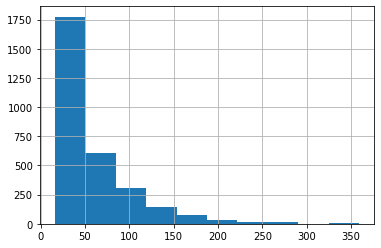

In [9]:
train.exercise_text.str.len().hist()
print(len(train[train.exercise_text.str.len()==0]))

In [10]:
print(train.shape)
print(test.shape)

train['none'] = 1 - train[list(train.columns)[2:]].max(axis=1)
train.describe()

(2977, 8)
(992, 8)


,三角函数,函数奇偶性,导数,平面向量,数列,逻辑与命题关系,集合,none
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.0
mean,0.023850,0.174672,0.251931,0.207592,0.250588,0.176688,0.052066,0.0
std,0.152606,0.379751,0.434195,0.405651,0.433424,0.381468,0.222197,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


函数奇偶性      520
导数         750
平面向量       618
数列         746
逻辑与命题关系    526
集合         155
none         0
dtype: int64
/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 22855 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20598 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Gly

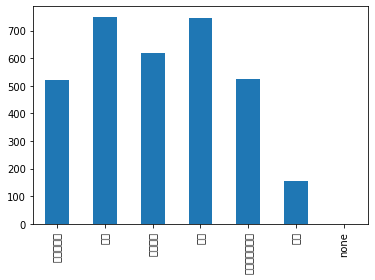

In [11]:
train[list(train.columns)[2:]].sum().plot(kind='bar')
print(train[list(train.columns)[2:]].sum())

In [26]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
  return re_tok.sub(r" \1 ", s).split()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenize, min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1, sublinear_tf=1)

trn_term_doc = train['exercise_text']
test_term_doc = test['exercise_text']

In [28]:
print(len(vec.vocabulary_))
print(vec.get_feature_names()[200:300])
# print(vec.idf_)

AttributeError: 'TfidfVectorizer' object has no attribute 'vocabulary_'

In [30]:
train[train['comment_text'].str.contains("-)", regex=False)]

KeyError: 'comment_text'

In [17]:
def pr(y_i, y):
    p = trn_term_doc[y==y_i].sum(axis=0)
    return (p+1) / ((y==y_i).sum()+1)

In [33]:
from sklearn.linear_model import LogisticRegression

def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True, solver='liblinear', max_iter=500)
    trn_term_doc_nb = trn_term_doc.multiply(r)
    return m.fit(trn_term_doc_nb, y), r

In [34]:
label_cols = list(train.columns)[1:-1]
print(label_cols)

['三角函数', '函数奇偶性', '导数', '平面向量', '数列', '逻辑与命题关系', '集合']


In [35]:
from sklearn.metrics import roc_auc_score

def multi_roc_auc_score(y_true, y_pred):
  scores = []
  for i in range(y_true.shape[1]):
    scores.append(roc_auc_score(y_true[:, i], y_pred[:, i]))
  return np.array(scores).mean()

In [31]:
preds = np.zeros((len(test), len(label_cols)))
preds1 = np.zeros((len(train), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_term_doc.multiply(r))[:,1]
    preds1[:,i] = m.predict_proba(trn_term_doc.multiply(r))[:,1]

fit 三角函数


TypeError: can only concatenate str (not "int") to str

In [33]:
print("ROCAUC Score:", multi_roc_auc_score(train[list(train.columns)[2:-1]].values, preds1))

ROCAUC Score: 0.9999246784576802


In [31]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [0]:
submid = pd.DataFrame({'id': test["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('submission.csv', index=False)